# CatBoost Model

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Set-Matplotlib-Options" data-toc-modified-id="Set-Matplotlib-Options-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set Matplotlib Options</a></span></li><li><span><a href="#Define-CatBoost-Params" data-toc-modified-id="Define-CatBoost-Params-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Define CatBoost Params</a></span></li><li><span><a href="#Columns-to-Drop" data-toc-modified-id="Columns-to-Drop-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Columns to Drop</a></span></li><li><span><a href="#Load-Dataframes-From-Pickle" data-toc-modified-id="Load-Dataframes-From-Pickle-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load Dataframes From Pickle</a></span></li><li><span><a href="#Run-CatBoost-Model" data-toc-modified-id="Run-CatBoost-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Run CatBoost Model</a></span><ul class="toc-item"><li><span><a href="#Tope-50-Important-Features" data-toc-modified-id="Tope-50-Important-Features-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Tope 50 Important Features</a></span></li><li><span><a href="#Plot-the-ROC_CURVE" data-toc-modified-id="Plot-the-ROC_CURVE-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Plot the ROC_CURVE</a></span></li></ul></li><li><span><a href="#Model-Results" data-toc-modified-id="Model-Results-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Results</a></span></li><li><span><a href="#Save-Predictions" data-toc-modified-id="Save-Predictions-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Save Predictions</a></span></li></ul></div>

## Introduction
In this section we build and evaluate a CatBoost model. It is specifically designed for categorical data training, but also applicable to regression tasks. The speed on GPU is claimed to be the fastest among these libraries. It has various methods in transforming catergorical features to numerical. The keys to its speed are linked to two Os: Oblivious Tree and Ordered Boosting. Oblivious Tree refers to the level-wised tree building with symmetric binary splitting (i.e each leaf on each level are split by a single feature), while Ordered Boosting applies permutation and sequential target encoding to convert categorical features.

## Load Libraries

In [7]:
import os
import sys
import gc
import pickle

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.fe_modeling2 import *

# Set Pandas Options

In [2]:
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000
pd.options.display.max_colwidth = 1000

## Set Matplotlib Options

In [3]:
# Set a few plotting defaults
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 12

## Define CatBoost Params

In [4]:
cat_params = {
    'n_estimators':100,
    'learning_rate': 0.07,
    'eval_metric':'AUC',
    'loss_function':'Logloss',
    'random_seed':SEED,
    'metric_period':500,
    'od_wait':500,
    'task_type':'GPU',
    'depth': 8,
    #'colsample_bylevel':0.7,
} 

## Columns to Drop 

In [5]:
cols_to_drop = [
    'D5_DT_W_std_score',
    'ProductCD_TransactionAmt_DT_W',
    'D4_DT_D_std_score',
    'D15_DT_D_std_score',
    'D3_DT_W_std_score',
    'D11_DT_W_std_score',
    'card3_card5_DT_W_week_day_dist',
    'card5_DT_W_week_day_dist',
    'D10_DT_D_std_score',
    'card3_card5_DT_D',
    'ProductCD_cents_DT_D',
    'D4_DT_W_std_score',
    'D15_DT_W_std_score',
    'uid_DT_D',
    'card3_DT_W_week_day_dist',
    'D10_DT_W_std_score',
    'D8_DT_D_std_score',
    'card3_card5_DT_W',
    'ProductCD_cents_DT_W',
    'uid_DT_W',
    'D8_DT_W_std_score'
]

## Load Dataframes From Pickle

In [8]:
X_train_fe = pd.read_pickle('../data/X_train_fe_engineered_cat.pkl')
X_val_fe = pd.read_pickle('../data/X_val_fe_engineered_cat.pkl')

y_train = pd.read_pickle('../data/y_train_fe_engineered_cat.pkl')
y_val = pd.read_pickle('../data/y_val_fe_engineered_cat.pkl')

with open('../data/cat_cols_fe_engineered_cat.pkl', 'rb') as f:
    category_cols1 = pickle.load(f)
    
with open('../data/feat_cols_fe_engineered_cat.pkl', 'rb') as f:
    feature_cols1 = pickle.load(f)

## Run CatBoost Model

feature_columns len after discard features: 536
(472432, 536) (118108, 536)
0:	learn: 0.9059317	test: 0.8439906	best: 0.8439906 (0)	total: 242ms	remaining: 24s
99:	learn: 0.9718325	test: 0.9413978	best: 0.9414623 (98)	total: 23.9s	remaining: 0us
bestTest = 0.9414623082
bestIteration = 98
Shrink model to first 99 iterations.
seed: 42 , auc: 0.9414622886435322 , best_iteration: 98
0:	learn: 0.8969279	test: 0.8383822	best: 0.8383822 (0)	total: 200ms	remaining: 19.8s
99:	learn: 0.9717709	test: 0.9421010	best: 0.9421010 (99)	total: 34.8s	remaining: 0us
bestTest = 0.9421010315
bestIteration = 99
seed: 43 , auc: 0.9421010461116403 , best_iteration: 99
0:	learn: 0.9122502	test: 0.8477095	best: 0.8477095 (0)	total: 214ms	remaining: 21.1s
99:	learn: 0.9718583	test: 0.9412227	best: 0.9412574 (98)	total: 36.8s	remaining: 0us
bestTest = 0.9412573576
bestIteration = 98
Shrink model to first 99 iterations.
seed: 44 , auc: 0.9412573497844595 , best_iteration: 98
avg preds auc: 0.94200, avg auc: 0.9416

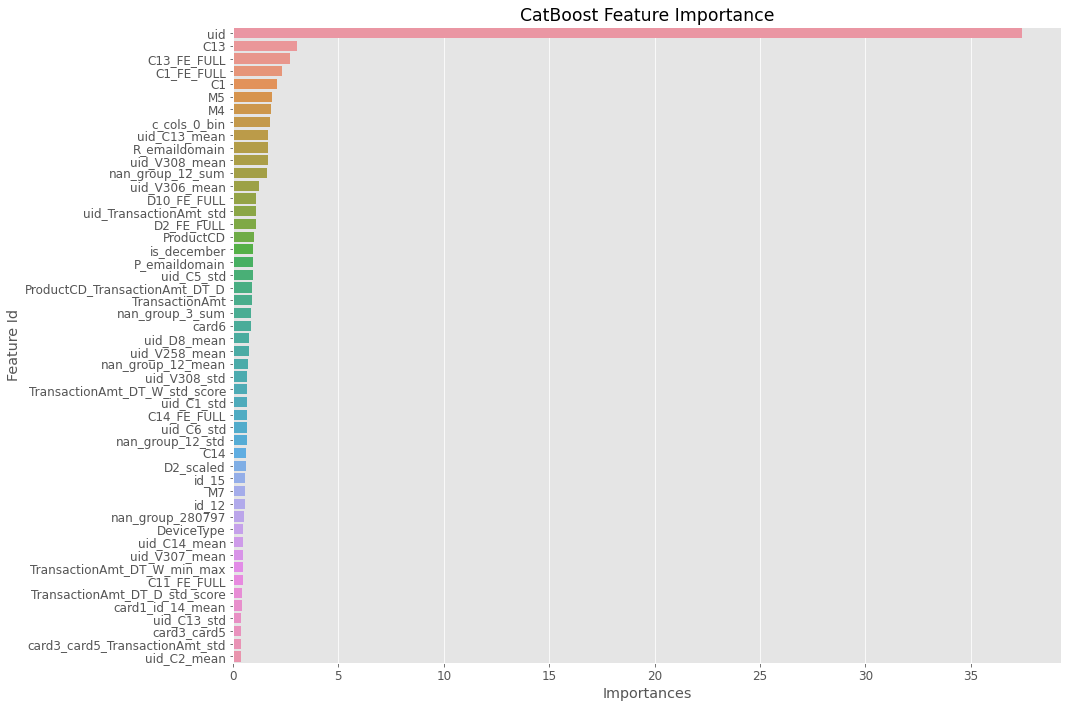

<Figure size 1080x432 with 0 Axes>

In [9]:
feature_columns = [col for col in feature_cols1 if col not in cols_to_drop]
print('feature_columns len after discard features:', len(feature_columns))
category_columns = [col for col in category_cols1 if col not in cols_to_drop]

best_iteration1, val_preds, fi_df = make_val_prediction(X_train_fe[feature_columns], y_train, X_val_fe[feature_columns],
                                                 y_val, cat_params=cat_params, category_cols=category_columns)

### Tope 50 Important Features

In [11]:
fi_df[:50]

,Feature Id,Importances
0,uid,37.425641
1,C13,3.036514
2,C13_FE_FULL,2.720076
3,C1_FE_FULL,2.322718
4,C1,2.071189
5,M5,1.830982
6,M4,1.810447
7,c_cols_0_bin,1.777398
8,uid_C13_mean,1.662432
9,R_emaildomain,1.650957


### Plot the ROC_CURVE

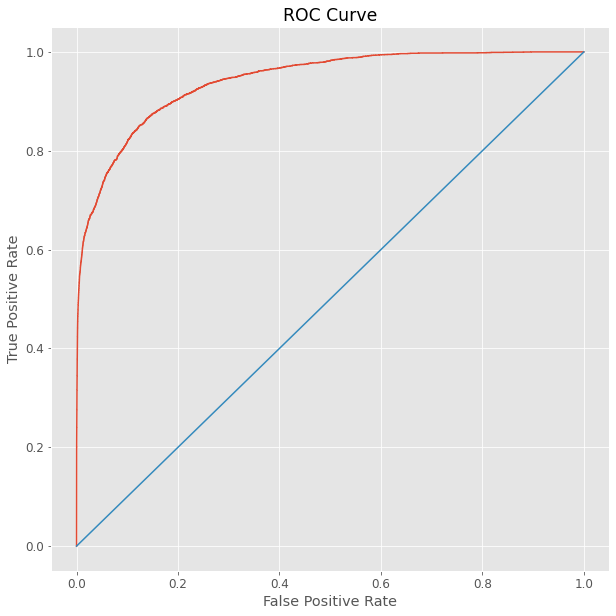

<Figure size 1080x432 with 0 Axes>

In [17]:
from sklearn.metrics import roc_curve

fpr,tpr,the = roc_curve(y_val,val_preds.mean(axis=1))

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr)
plt.plot(np.arange(0.0,1.2,0.2),np.arange(0.0,1.2,0.2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
plt.savefig('../images/cat_ROC_Curve.png')

## Model Results
This model scores very well.

**avg preds auc: `0.94200`, avg auc: `0.94161+/-0.00036`**<p></p>
This model is heavily dependant on the engineered feature `uid`. 

## Save Predictions

In [12]:
np.save('val_preds_cat.npy', val_preds)